In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

data = pd.read_csv('dataset.arff')

In [2]:
x = data[['A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score','A9_Score','A10_Score','gender','jundice','austim']]
y = data['Class/ASD']

x = x.rename(columns={'jundice':'jaundice', 'austim':'PDD'})

print(x.shape)
print(y.shape)

(704, 13)
(704,)


In [3]:
x.gender[x.gender=='f'] = 0
x.gender[x.gender=='m'] = 1

x.jaundice[x.jaundice=='no'] = 0
x.jaundice[x.jaundice=='yes'] = 1

x.PDD[x.PDD=='no'] = 0
x.PDD[x.PDD=='yes'] = 1

c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removi

In [4]:
x.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,gender,jaundice,PDD
0,1,1,1,1,0,0,1,1,0,0,0,0,0
1,1,1,0,1,0,0,0,1,0,1,1,0,1
2,1,1,0,1,1,0,1,1,1,1,1,1,1
3,1,1,0,1,0,0,1,1,0,1,0,0,1
4,1,0,0,0,0,0,0,1,0,0,0,0,0


In [5]:
y.value_counts()

NO     515
YES    189
Name: Class/ASD, dtype: int64

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(x)
pca_data

array([[ 0.11520715,  0.33239477],
       [-0.11006323,  0.11301489],
       [ 0.98276435, -0.46971614],
       ...,
       [ 0.63819491, -0.48322789],
       [ 0.52162236, -0.73010967],
       [ 1.03665114, -0.46962588]])

In [7]:
pca_data = np.vstack((pca_data.T, y)).T
pca_data

array([[0.11520715391593873, 0.3323947650397765, 'NO'],
       [-0.11006322604131502, 0.11301488705472755, 'NO'],
       [0.9827643453262748, -0.4697161418897911, 'YES'],
       ...,
       [0.6381949145117868, -0.48322789168714037, 'YES'],
       [0.5216223584888908, -0.7301096716473876, 'NO'],
       [1.0366511426324838, -0.4696258776474351, 'YES']], dtype=object)

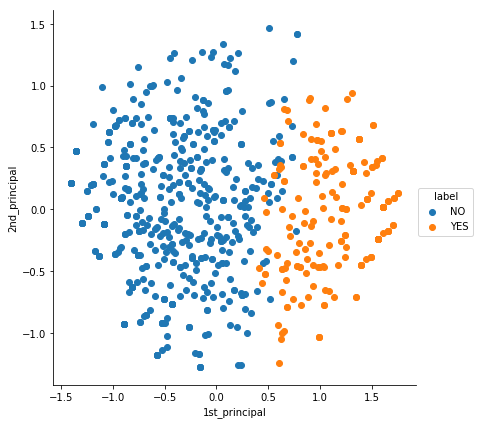

In [8]:
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sns.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

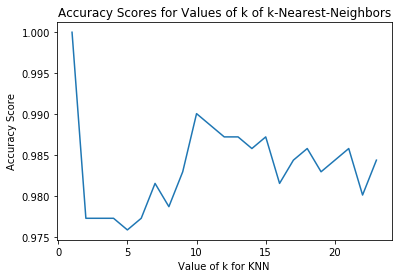

In [9]:
k_range = list(range(1,24))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x, y)
    y_pred = knn.predict(x)
    scores.append(metrics.accuracy_score(y, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [10]:
logreg = LogisticRegression()
logreg.fit(x, y)
y_pred = logreg.predict(x)
print(metrics.accuracy_score(y, y_pred))

0.9829545454545454


In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.09, random_state=5)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(640, 13)
(640,)
(64, 13)
(64,)


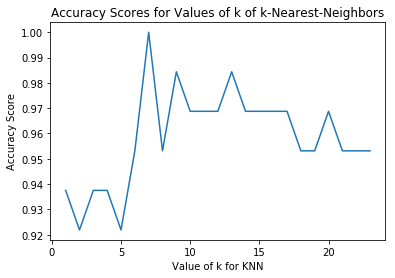

In [12]:
k_range = list(range(1,24))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [13]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))

0.96875


In [14]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train, y_train)

knn.predict(x_test)

array(['NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO',
       'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES',
       'YES', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'YES', 'NO',
       'NO', 'NO', 'NO', 'YES', 'NO', 'YES', 'YES', 'NO', 'YES', 'YES',
       'YES', 'NO', 'NO', 'NO', 'YES', 'NO', 'YES', 'YES', 'YES', 'NO',
       'NO', 'YES'], dtype=object)

In [15]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train, y_train)

knn.predict([[1,1,1,0,1,1,0,0,0,0,0,0,1]])

array(['NO'], dtype=object)

In [16]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train, y_train)

knn.predict([[1,1,0,1,1,0,1,1,1,1,1,1,1]])

array(['YES'], dtype=object)